In [1]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from src.Functions.functions import *


choose a player from all the league

In [2]:
player = "L. James"

Here, we analyse in each match the actions of the player

In [3]:
with open('Data/NBA_Matches_Stats.json') as f:
    data = json.load(f)

points = []
df = pd.DataFrame()
for d in data:
    for action in d["playByPlay"]["actions"]:
        if "Shot" in action['actionType']:
            if action["playerNameI"] == player:
                df = pd.concat([df, pd.DataFrame(action, index=[0])], ignore_index=True)

df = df.rename(columns={"actionType": "Shot Type"})


With that information, we can show all the shot he has tried and made

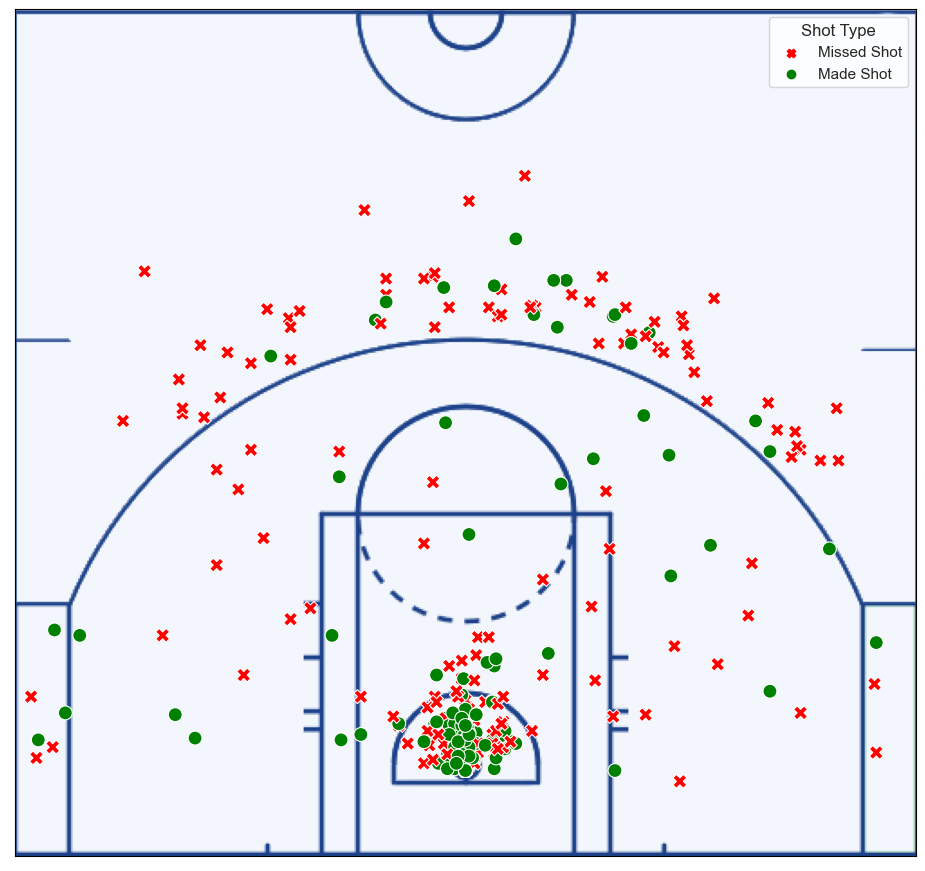

In [4]:
# change palette

img = plt.imread("Images/court.png")
fig, ax = plt.subplots(figsize=(12, 11))
ax.imshow(img, extent=[-270, 270, -67.5, 442.5])
# plot the shots
sns.set_theme(style="white", palette="muted", color_codes=True)
sns.scatterplot(x="xLegacy", y="yLegacy", data=df, hue="Shot Type", style="Shot Type", s=100, legend=True,
                palette=["red", "green"], style_order=["Made Shot", "Missed Shot"])
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_visible(False)
cur_axes.axes.get_yaxis().set_visible(False)
plt.xlim(250, -250)
plt.ylim(-47.5, 422.5)

plt.show()

We can also see compared to the average shoot success of the league

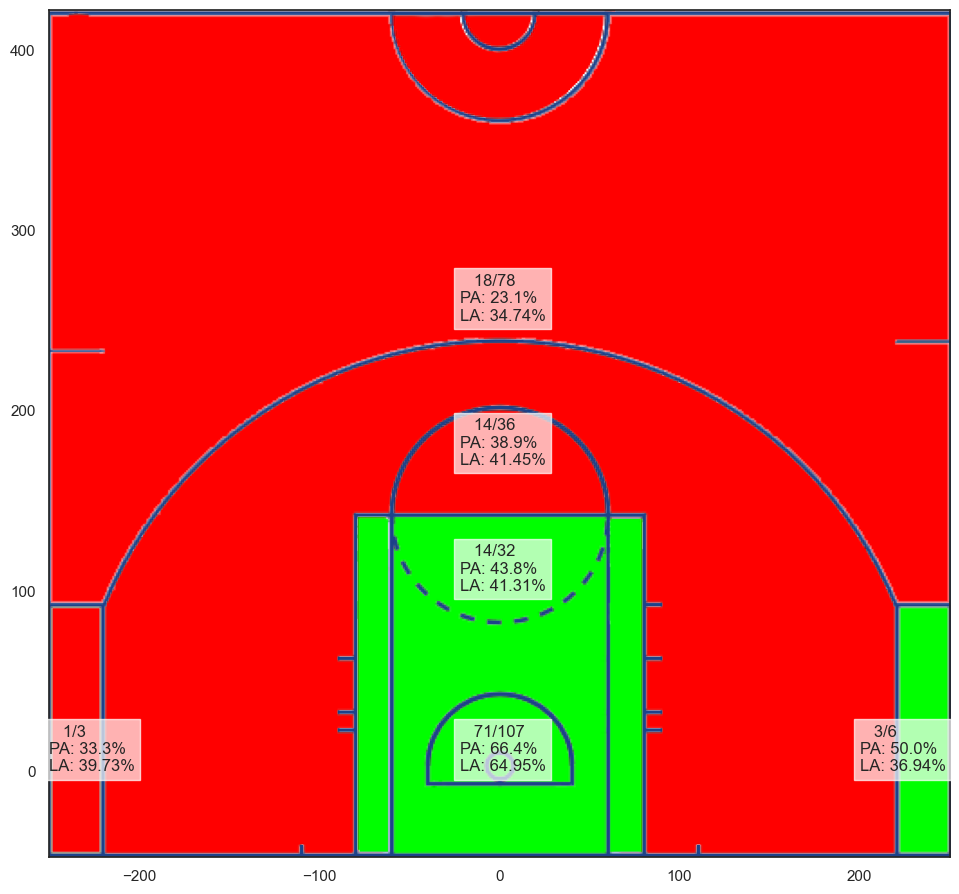

In [5]:

# add if the shot is a 3 pointer or not
df["zone"] = df.apply(lambda r: get_zone_(r), axis=1)

images = [(plt.imread("Images/court-top.png")), plt.imread("Images/court-inside.png"),
          plt.imread("Images/court-bottom-left.png"),
          plt.imread("Images/court-2points.png"),
          plt.imread("Images/court-hoop.png"), plt.imread("Images/court-bottom-right.png")]

# check the accuracy of each zones
zones = df.groupby(["zone", "Shot Type"]).agg({"Shot Type": "count"})
percent = zones["Shot Type"].unstack()["Made Shot"] / (
        zones["Shot Type"].unstack()["Missed Shot"] + zones["Shot Type"].unstack()["Made Shot"])

with open('Data/LeagueAverage.json') as f:
    league_avg = json.load(f)

league_avg = clean_league_avg(league_avg)


fig, ax = plt.subplots(figsize=(12, 11))
img = plt.imread("Images/court.png")
ax.imshow(img, extent=[-270, 270, -67.5, 442.5])

for id in range(len(images)):
    for i in images[id]:
        for j in i:
            if j[3] != 0:
                if (float(percent[id])) > float(league_avg[id]):
                    j[0] = j[2] = 0
                else:
                    j[2] = j[1] = 0

    ax.imshow(images[id], extent=[-270, 270, -67.5, 442.5])

add_text(ax,zones,league_avg,percent)
plt.xlim(-250, 250)
plt.ylim(-47.5, 422.5)

plt.show()

Now we are going to analyse if the myth of being tall is really impactful of the number of points scored

470


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '175.0'),
  Text(1, 0, '180.0'),
  Text(2, 0, '185.0'),
  Text(3, 0, '190.0'),
  Text(4, 0, '195.0'),
  Text(5, 0, '200.0'),
  Text(6, 0, '205.0'),
  Text(7, 0, '210.0'),
  Text(8, 0, '215.0'),
  Text(9, 0, '220.0')])

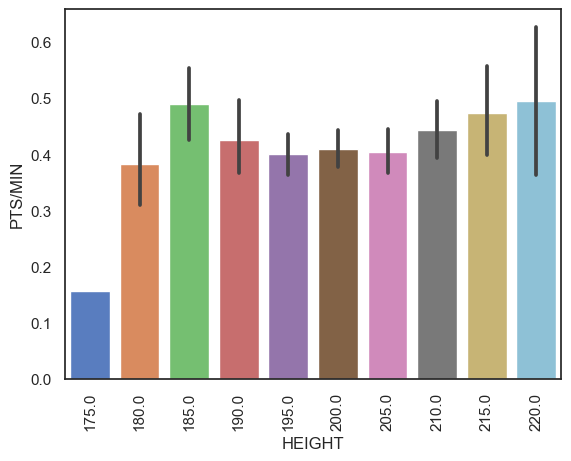

In [6]:
players = pd.read_csv("Data/NBA_Players_Stats.csv")
players = players[players["MIN"]!=0]
players["PTS/MIN"] = players["PTS"]/players["MIN"]
print(len(players))
players["HEIGHT"] = players["PLAYER_HEIGHT_INCHES"]*2.54
players["HEIGHT"] = players["HEIGHT"] - players["HEIGHT"] % 5

sns.barplot(players,x="HEIGHT",y="PTS/MIN")
plt.xticks(rotation=90)


We can see that even tho people are on average 2. meter tall, we can observe that people mesuring on average 1.85m can score the same as people above 2.10m
But may be its correlated to the position?

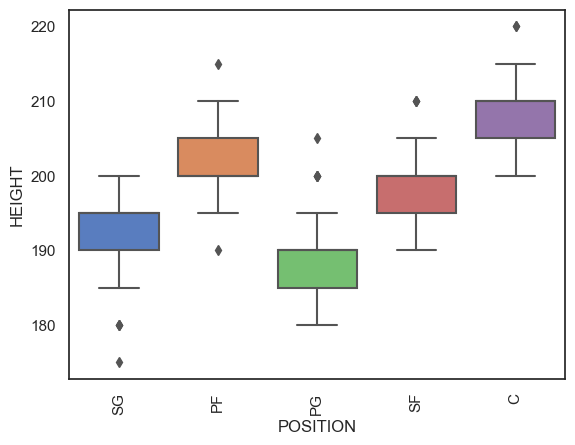

<AxesSubplot: xlabel='POSITION', ylabel='PTS/MIN'>

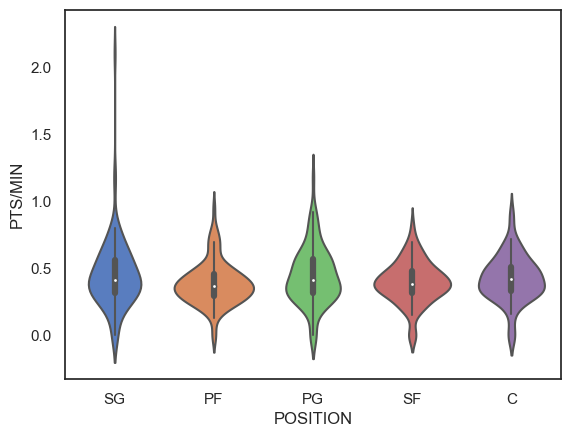

In [7]:
sns.boxplot(players,x="POSITION",y="HEIGHT")
plt.xticks(rotation=90)
plt.show()
sns.violinplot(players,x="POSITION",y="PTS/MIN")

We observe that even tho the height is correlated to the position, the points/ minutes average is almost the same for every position
In consequences, we can deduce that the height is not really as important as everyone says (if you are taller than 1.80m

<AxesSubplot: >

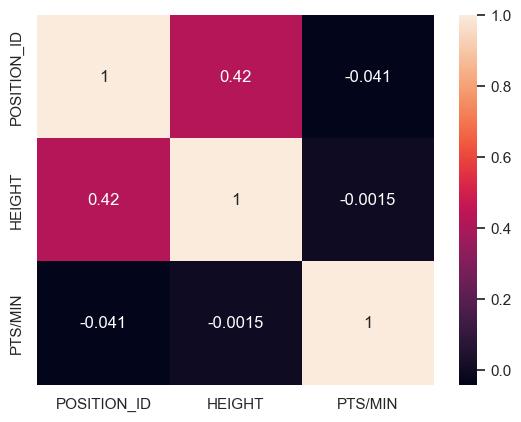

In [8]:

players["POSITION_ID"] = players["POSITION"].map({"SG":1,"PF":2,"PG":3,"SF":4,"C":5})
players["POSITION_ID"] = players["POSITION_ID"].dropna()

sns.heatmap(players[["POSITION_ID","HEIGHT","PTS/MIN"]].corr(),annot=True)

This is confirmed by the correlation matrix